Mounting the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive


Importing the libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                      #for plotting
from sklearn.tree import DecisionTreeClassifier                      #algorithm1
from sklearn.naive_bayes import GaussianNB                           #algorithm2
from sklearn.svm import SVC                                          #algorithm3
from sklearn.metrics import roc_auc_score, roc_curve, auc            #performance metrics
from sklearn.ensemble import AdaBoostClassifier                      #for boosting
from sklearn.ensemble import VotingClassifier                        #for maxvoting

Training and testing dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/training.csv', encoding='latin1')
test_data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/testing.csv', encoding='latin1')

# Classification Section

Dropping the redundant columns

In [4]:
col = ["Next_Year_Crime_Rate", "state"]

for i in col:
    data = data.drop(i, axis=1)
    test_data = test_data.drop(i, axis=1)


In [5]:
X = data.drop("Next_Year_Top_10", axis=1)
Y = data["Next_Year_Top_10"]

In [6]:
X_test = test_data.drop("Next_Year_Top_10", axis=1)
Y_test = test_data["Next_Year_Top_10"]

Scaling the values

In [7]:
X["year"] = [(1 + (i-1980)) for i in X["year"]]
X_test["year"] = [(1 + (i-1980)) for i in X_test["year"]]

#This allows for the scaling of the years to be the same (i.e. 1980 is the same distance away from 1981 as 1981 is from 1982) and the timeline/linearity to stay the same as well (i.e. 1980 < 1981) -LM

Build our model using Decision Tree, SVM and Gaussian Naive Bayes

In [8]:
estimators = []

dt_model = DecisionTreeClassifier()
estimators.append(("Decision Tree: ", dt_model))

svc_model = SVC(probability=True)
estimators.append(("Support Vector: ", svc_model))

gb_model = GaussianNB()
estimators.append(("Gaussian Naive Bayes: ", gb_model))

Building individual model with each classifier

In [9]:
#individual models accuracy score
from sklearn.metrics import accuracy_score
#j = 1
#i = range(3)
#for n in i:
for each_estim in (dt_model, svc_model, gb_model):
    each_estim.fit(X, Y)
    Y_pred = each_estim.predict(X_test)
    print(each_estim, accuracy_score(Y_test,Y_pred))

DecisionTreeClassifier() 0.8862745098039215
SVC(probability=True) 0.792156862745098
GaussianNB() 0.792156862745098


#Max-Voting

Ensemble the models using *VotingClassifier*

In [10]:
#ensemble our models and use VotingClassifier to score the accuracy of the ensemble model

ensemble_model_hard = VotingClassifier(estimators=estimators, voting='hard')
ensemble_model_soft = VotingClassifier(estimators=estimators, voting='soft')

Calculate accuracy of the model

In [11]:
#SVC algo have predict_proba method to predict class probabilities
ensemble_model_hard.fit(X, Y)
ensemble_model_soft.fit(X, Y)
ensemble_pred_hard = ensemble_model_hard.predict(X_test)
ensemble_pred_soft = ensemble_model_soft.predict(X_test)
ensemble_score_hard = accuracy_score(Y_test, ensemble_pred_hard)
ensemble_score_soft = accuracy_score(Y_test, ensemble_pred_soft)

print("Ensemble CLassifier using Hard Voting: ", ensemble_score_hard)
print("Ensemble CLassifier using Soft Voting: ", ensemble_score_soft)

Ensemble CLassifier using Hard Voting:  0.8196078431372549
Ensemble CLassifier using Soft Voting:  0.8235294117647058


# Boosting

In [12]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X,Y)

DecisionTreeClassifier(random_state=0)

In [13]:
print("The accuracy is:", (dt_model.score(X_test, Y_test))*100, '%')

y_pred_tree = dt_model.predict_proba(X_test)
fpr_tree, tpr_tree, threshold = roc_curve(Y_test, y_pred_tree[:,1])
auc_tree = auc(fpr_tree, tpr_tree)
print("The auc score is: ", auc_tree)

The accuracy is: 88.23529411764706 %
The auc score is:  0.7680487804878049


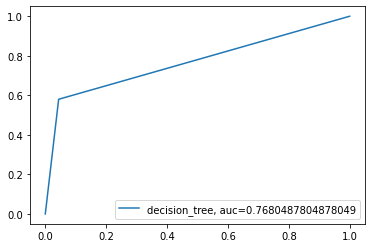

In [14]:
plt.plot(fpr_tree,tpr_tree,label="decision_tree, auc="+str(auc_tree))
plt.legend(loc=4)
plt.show()

In [15]:
Adaboost = AdaBoostClassifier(n_estimators=100, base_estimator=dt_model, learning_rate=0.05, random_state=0)
Adaboost.fit(X,Y)


print("The accuracy is: ", (Adaboost.score(X_test, Y_test))*100, '%')


y_pred_adaboost = Adaboost.predict_proba(X_test)
fpr_adaboost, tpr_adaboost, threshold = roc_curve(Y_test, y_pred_adaboost[:,1])
auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
print("The auc score is: ", auc_adaboost)

The accuracy is:  84.70588235294117 %
The auc score is:  0.6856097560975609


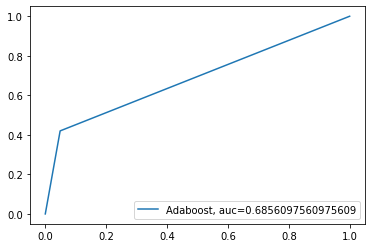

In [16]:
plt.plot(fpr_adaboost,tpr_adaboost,label="Adaboost, auc="+str(auc_adaboost))
plt.legend(loc=4)
plt.show()

In [17]:
Adaboost_with_tune = AdaBoostClassifier(n_estimators=50, base_estimator=dt_model, learning_rate=0.001, random_state=0)
Adaboost_with_tune.fit(X,Y)

print("The accuracy is: ", (Adaboost_with_tune.score(X_test, Y_test))*100, '%')


y_pred_adaboost_tune = Adaboost_with_tune.predict_proba(X_test)
fpr_adaboost_tune, tpr_adaboost_tune, threshold = roc_curve(Y_test, y_pred_adaboost_tune[:,1])
auc_adaboost_tune = auc(fpr_adaboost_tune, tpr_adaboost_tune)
print("The auc score is: ", auc_adaboost_tune)

The accuracy is:  84.70588235294117 %
The auc score is:  0.6856097560975609


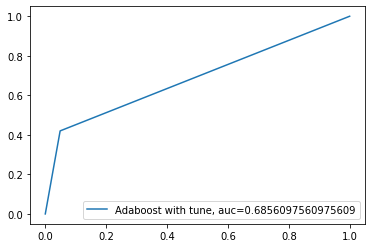

In [18]:
plt.plot(fpr_adaboost_tune,tpr_adaboost_tune,label="Adaboost with tune, auc="+str(auc_adaboost_tune))
plt.legend(loc=4)
plt.show()

# Regression Section

In [19]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

In [20]:
data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/training.csv', encoding='latin1')
test_data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/testing.csv', encoding='latin1')

In [21]:
col = ["Next_Year_Top_10", "state"]

for i in col:
    data = data.drop(i, axis=1)
    test_data = test_data.drop(i, axis=1)

In [22]:
X = data.drop("Next_Year_Crime_Rate", axis=1)
Y = data["Next_Year_Crime_Rate"]

In [23]:
X_test = test_data.drop("Next_Year_Crime_Rate", axis=1)
Y_test = test_data["Next_Year_Crime_Rate"]

In [24]:
X["year"] = [(1 + (i-1980)) for i in X["year"]]
X_test["year"] = [(1 + (i-1980)) for i in X_test["year"]]

#This allows for the scaling of the years to be the same (i.e. 1980 is the same distance away from 1981 as 1981 is from 1982) and the timeline/linearity to stay the same as well (i.e. 1980 < 1981) -LM

# Bagging

In [25]:
regressors = LinearRegression()
bag_lr_model = BaggingRegressor(regressors, max_features=1.0, n_estimators=5, bootstrap=True, random_state=1)

bag_lr_model.fit(X,Y)
bag_lr_model.score(X_test, Y_test)
pred_val = bag_lr_model.predict(X_test)

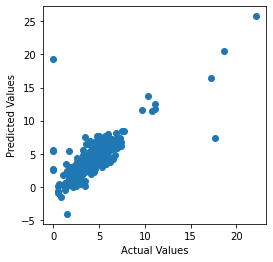

In [26]:
plt.figure(figsize=(4,4))
plt.scatter(Y_test, pred_val)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [27]:
bag_lr_model = BaggingRegressor(regressors, max_features=1.0, n_estimators=50, bootstrap=True, random_state=1)

bag_lr_model.fit(X,Y)
bag_lr_model.score(X_test, Y_test)
pred_val2 = bag_lr_model.predict(X_test)

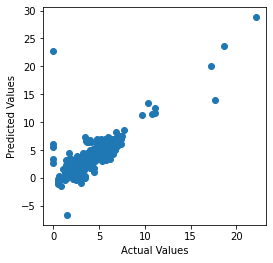

In [28]:
plt.figure(figsize=(4,4))
plt.scatter(Y_test, pred_val2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Weighted Averaging

In [29]:
import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor

In [30]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation="relu"))
ann.add(tf.keras.layers.Dense(units=10, activation="relu"))
ann.add(tf.keras.layers.Dense(units=10, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1))

In [31]:
ann.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
avg_lr_model = LinearRegression()
regtree_model = DecisionTreeRegressor()

In [33]:
avg_lr_model.fit(X,Y)
ann.fit(X,Y, epochs=100)
regtree_model.fit(X,Y)

Epoch 1/100
47/47 [==============================] - 1s 1ms/step - loss: 1025.0465
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 107.7030
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 52.6441
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 39.2876
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 32.3408
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 28.2130
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 27.7403
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 25.6343
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 24.9097
Epoch 10/100
47/47 [==============================] - 0s 1ms/step - loss: 25.2798
Epoch 11/100
47/47 [==============================] - 0s 1ms/step - loss: 23.3183
Epoch 12/100
47/47 [==============================] - 0s 1ms/step - loss: 21.8571
Epoch 13/100
47/47 [==

DecisionTreeRegressor()

In [34]:
linreg_preds = avg_lr_model.predict(X_test)
ann_preds = ann.predict(X_test)
regtree_preds = regtree_model.predict(X_test)

In [35]:
weighted_avg_preds=(linreg_preds * 0.3 + ann_preds * 0.4 + regtree_preds * 0.3)

In [36]:
weighted_avg_preds

array([[5.74308404, 5.70865204, 5.65867901, ..., 4.28792678, 3.55596071,
        4.21876772],
       [5.51563963, 5.48120763, 5.4312346 , ..., 4.06048237, 3.3285163 ,
        3.99132331],
       [5.08272251, 5.04829051, 4.99831748, ..., 3.62756525, 2.89559918,
        3.55840619],
       ...,
       [4.43776485, 4.40333285, 4.35335982, ..., 2.98260759, 2.25064152,
        2.91344853],
       [4.49628552, 4.46185353, 4.4118805 , ..., 3.04112826, 2.30916219,
        2.9719692 ],
       [4.40910336, 4.37467136, 4.32469833, ..., 2.9539461 , 2.22198003,
        2.88478704]])